# MINERIA DE DATOS - TUIA - 2024
## Trabajo práctico N° 1
### Estudiante: Yañez, Mirian

### El siguiente trabajo se realiza con el conjunto de datos "Crop_recommendation.csv"

Campos de datos:

N - proporción de contenido de nitrógeno en el suelo

P - proporción de contenido de fósforo en el suelo

K - proporción de contenido de potasio en el suelo

temperatura - temperatura en grados Celsius

humedad - humedad relativa en %

ph - valor de pH del suelo

lluvia - precipitación en mm



### Instalo las dependencias necesarias

In [1]:
!pip install plotly

zsh:1: command not found: pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.manifold import Isomap, TSNE
from sklearn.cluster import KMeans
from gap_statistic import OptimalK
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings("ignore")

# Carga del dataset Crop_recommendation.csv

In [3]:
data = pd.read_csv('data/Crop_recommendation.csv')

# Exploración de datos

### Para comenzar ejecuto los comandos básicos para comprender el contenido, tipos de atributos, cantidad de datos faltantes/nulos y la distribución de los datos del dataset.

In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
# Redondeo los valores de las columnas float con 6 decimales después de la coma
for column in data.columns:
    if data[column].dtype == 'float64':
        data[column] = data[column].round(6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## Se puede observar que el dataset cuenta con un total de 2200 datos, los mismos son de tipo int64, float64 y la variable label de tipo object

In [7]:
# Observo si hay valores nulos
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## No hay valores nulos en ninguna de las variables

# Estadística descriptiva 

In [8]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769374,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473145,6.425045,94.867625
75%,84.250000,68.000000,49.000000,28.561654,89.948770,6.923642,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560118


## Histogramas

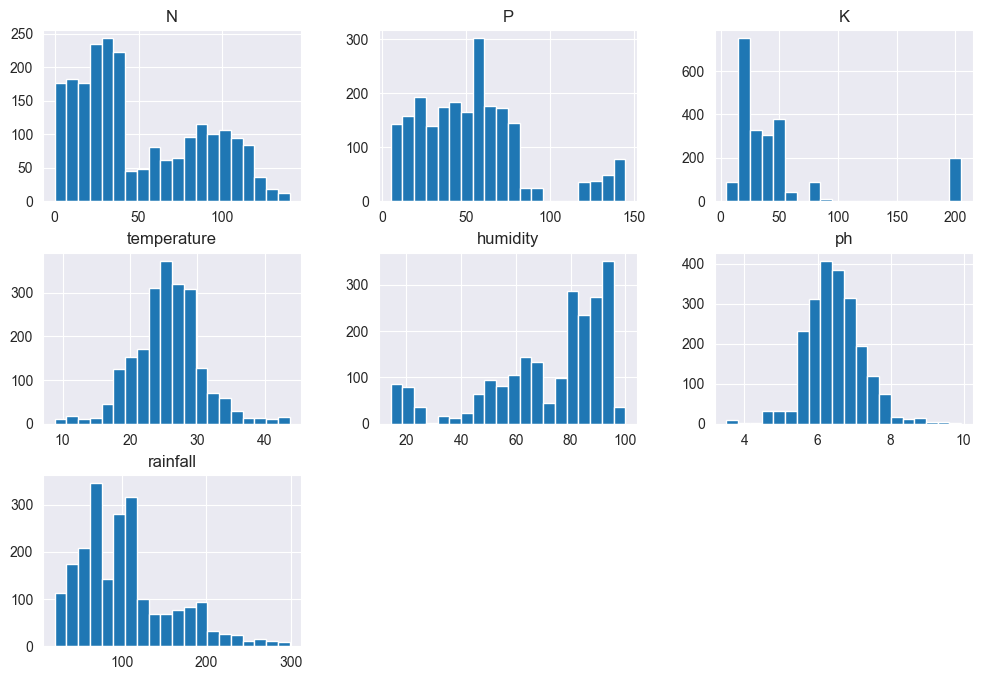

In [9]:
data.hist(bins=20, figsize=(12, 8))
plt.show()

En los histograma puedo observar que la columnas temperature y ph se asemejan a la distribución normal mientras que en las otras columnas se observa gran disparidad de datos.

# Matriz de correlación

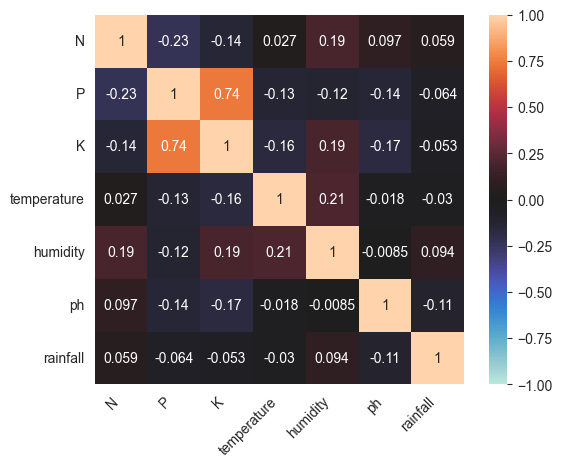

In [10]:
corr = data.drop(['label'], axis=1).corr()
ax = sns.heatmap(
                corr,
                vmin=-1, vmax=1, center=0,
                square=True,
                annot = True,
                annot_kws = {'size': 10}
            )
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Las variables con mayor correlacion lineal positiva son:

P - K (0.74)

Humedity - temperature (0.21)

Humedity - N (0.19)

Humedity - k (0.19)

Las variables con mayor correlacion lineal negativa son:

N - P (-0.23)

Ph - K (-0.17)

Temperature - K (-0.16)

# Boxplot

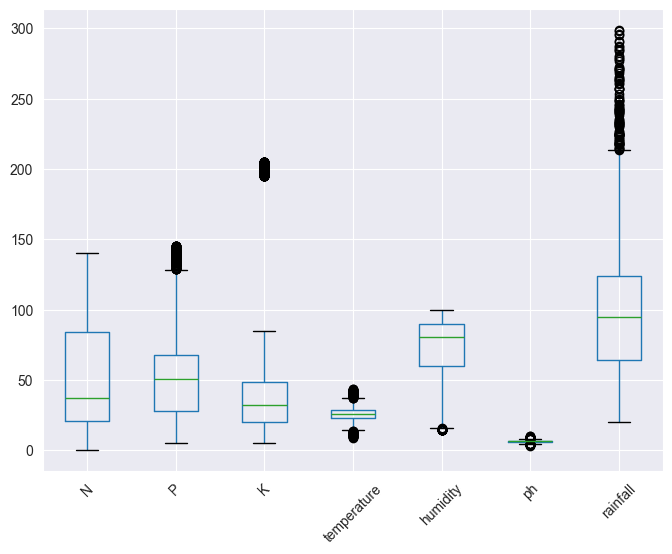

In [11]:
plt.figure(figsize=(8, 6))
data.boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

## Se observa una gran cantidad de valores que aparentan ser outliers, investigo a cuales pertenecen

# Distintos tipos de cultivos

In [12]:
np.unique(data['label'])

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [13]:
len(np.unique(data['label']))

22

In [14]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

### Podemos ver que hay 100 registros para cada uno de los 22 cultivos

In [15]:
outliers_k = data[data['K'] > 150]
outliers_k

,N,P,K,temperature,humidity,ph,rainfall,label
1200,24,130,195,29.996772,81.541566,6.112306,67.125345,grapes
1201,13,144,204,30.728040,82.426141,6.092242,68.381355,grapes
1202,22,123,205,32.445778,83.885049,5.896343,68.739325,grapes
1203,36,125,196,37.465668,80.659687,6.155261,66.838723,grapes
1204,24,131,196,22.032962,83.743728,5.732454,65.344408,grapes
...,...,...,...,...,...,...,...,...
1595,40,120,197,23.805938,92.488795,5.889481,119.633555,apple
1596,25,132,198,22.319441,90.851744,5.732758,100.117344,apple
1597,31,137,196,22.144641,93.825674,6.400321,120.631078,apple
1598,36,144,196,23.651676,94.505288,6.496934,115.361127,apple


In [16]:
outliers_k.label.unique()

array(['grapes', 'apple'], dtype=object)

In [17]:
outliers_p = data[data['P'] > 132]
outliers_p

,N,P,K,temperature,humidity,ph,rainfall,label
1201,13,144,204,30.728040,82.426141,6.092242,68.381355,grapes
1206,35,140,197,16.775573,82.752419,6.106191,66.762855,grapes
1209,17,134,204,39.040720,80.183933,6.499605,73.884670,grapes
1211,27,145,205,9.467960,82.293355,5.800243,66.027652,grapes
1213,16,139,203,17.828037,80.960934,6.275641,65.847488,grapes
...,...,...,...,...,...,...,...,...
1593,14,140,197,23.352251,90.900547,6.071255,113.038138,apple
1594,35,145,195,22.039115,94.580758,6.231950,110.980401,apple
1597,31,137,196,22.144641,93.825674,6.400321,120.631078,apple
1598,36,144,196,23.651676,94.505288,6.496934,115.361127,apple


In [18]:
outliers_p.label.unique()

array(['grapes', 'apple'], dtype=object)

### Se puede concluir que los valores que parecian ser outliers son valores excusivos para los cultivos de 'grapes' y 'apple'

# Estandarización de datos

### Utilizo el método Standar Scaler para estandarizarlos.


In [19]:
# Selecciono las columnas numéricas para estandarizar
columns_to_scale = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

scaler = StandardScaler()
data_standar = scaler.fit_transform(data[columns_to_scale])

# Aplico PCA para determinar el número de componentes principales del dataset

#### Primero voy a obtener las componentes principales y luego determinar el criterio adecuado para la selección de la cantidad de componentes a analizar.
Criterios de selección: 
* Proporción de variancia acumulada (~75% -80%)
* Criterio de Kaiser (eigenvalues > 1)
* Gráfico del codo (Scree)

In [20]:
columns_for_pca = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

pca = PCA()
X_pca = pca.fit_transform(data_standar)

### Proporción de varianza acumulada

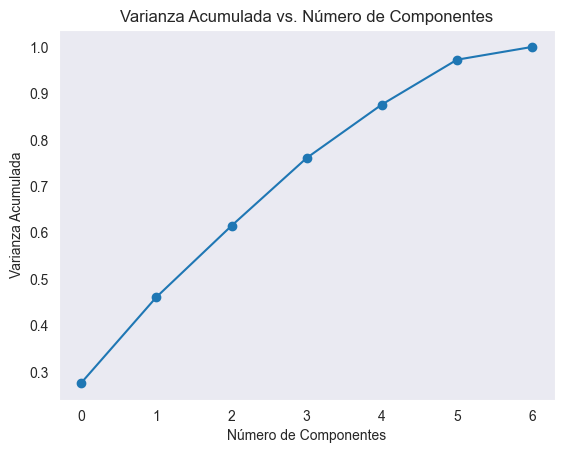

In [21]:
# Calcula la varianza acumulada
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = explained_variance.cumsum()

# Grafica la varianza acumulada
plt.plot(explained_variance_cumulative, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada vs. Número de Componentes')
plt.grid()
plt.show()

In [22]:
# Determina el número de componentes a retener
n_components_to_retain = 0
threshold = 0.75  # Umbral de varianza acumulada deseado
for i, variance in enumerate(explained_variance_cumulative):
    if variance >= threshold:
        n_components_to_retain = i + 1
        break
print(f"Número de componentes a retener para una varianza acumulada del {threshold}: {n_components_to_retain}")

Número de componentes a retener para una varianza acumulada del 0.75: 4


### Gráfico del codo

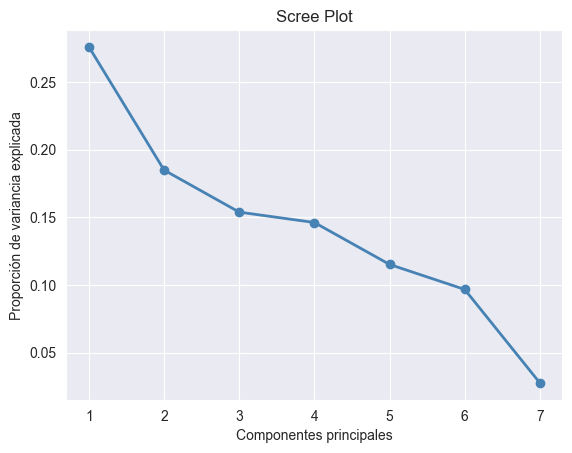

In [23]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.show()

Al observar el gráfico del codo, el quiebre parece producirse en la tercera componente.

### Autovalores y varinza acumulada

In [24]:
pd.DataFrame({'Autovalor': pca.explained_variance_,
              'Varianza explicada': pca.explained_variance_ratio_,
              'Varianza acumulada': np.cumsum(pca.explained_variance_ratio_)})

,Autovalor,Varianza explicada,Varianza acumulada
0,1.932096,0.275888,0.275888
1,1.294499,0.184844,0.460733
2,1.076999,0.153787,0.614520
3,1.023356,0.146127,0.760647
4,0.806295,0.115133,0.875780
5,0.676869,0.096652,0.972431
6,0.193069,0.027569,1.000000


### Según los autovalores, los superiores a 1 por el Criterio de Kaiser se debería optar por extraer cuatro.
### Por los criterios de selección, para este dataset me voy a quedar con las primeras 4 componentes por el criterio de Kaiser y por la proporción de varianza acumulada

### Gráfico de varianza acumulada

In [25]:
pca2 = PCA(n_components=4)
X_pca = pca2.fit_transform(data_standar)

Text(0.5, 1.0, 'Varianza acumulada')

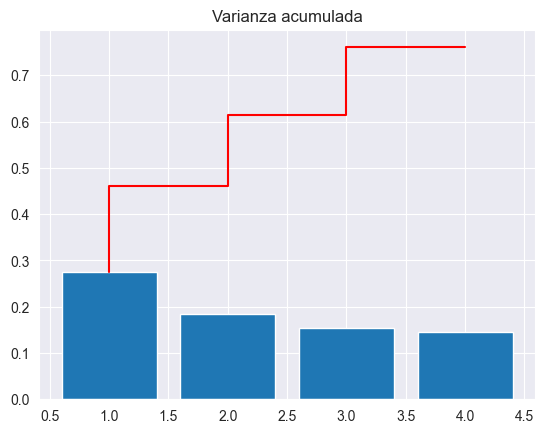

In [26]:
plt.bar(range(1, len(pca2.explained_variance_) + 1),
        pca2.explained_variance_ratio_)

plt.step(range(1, len(pca2.explained_variance_) + 1),
         np.cumsum(pca2.explained_variance_ratio_),
         c='red')

plt.title('Varianza acumulada')

### Se puede observar en este gráfico que las cuatro componentes representan el 75% de los datos

### PCA 2D

In [59]:
fig = px.scatter(X_pca,
                 x=0,
                 y=1,
                 color=data['label'],
                 labels={
                     '0': 'Componente 1',
                     '1': 'Componente 2',
                     'color': 'label',
                 })
fig.update_xaxes(title='Componente 1')
fig.update_yaxes(title='Componente 2')
fig.update_layout(title='PCA en 2D con 2 componentes.')
fig

### PCA 3D

In [60]:
fig = px.scatter_3d(X_pca,
                    x=0,
                    y=1,
                    z=2,
                    color=data['label'],
                    labels={
                        '0': 'Componente 1',
                        '1': 'Componente 2',
                        '2': 'Componente 3',
                        'color': 'label'
                    },
                    height=700,
                    width=900)
fig.update_layout(title='PCA en 3D con 3 componentes')
fig

# Isomap

Experimentación con los hiperparámetros (número de vecinos y componentes)

In [61]:
isomap_crop = Isomap(n_neighbors=2, n_components=2)
isomap_features = isomap_crop.fit_transform(data_standar)

fig = px.scatter(isomap_features,
                 x=0,
                 y=1,
                 color=data['label'],
                 labels={'color': 'Clase'})
fig.update_xaxes(title='Componente 1')
fig.update_yaxes(title='Componente 2')
fig.update_layout(title='Isomap 2 componentes principales.')
fig

In [62]:
isomap_crop = Isomap(n_neighbors=60, n_components=4)
isomap_features = isomap_crop.fit_transform(data_standar)

fig = px.scatter(isomap_features,
                 x=0,
                 y=1,
                 color=data['label'],
                 labels={'color': 'Clase'})
fig.update_xaxes(title='Componente 1')
fig.update_yaxes(title='Componente 2')
fig.update_layout(title='Isomap 4 componentes principales.')
fig

In [63]:
isomap_crop = Isomap(n_neighbors=130, n_components=6)
isomap_features = isomap_crop.fit_transform(data_standar)

fig = px.scatter(isomap_features,
                 x=0,
                 y=1,
                 color=data['label'],
                 labels={'color': 'Clase'})
fig.update_xaxes(title='Componente 1')
fig.update_yaxes(title='Componente 2')
fig.update_layout(title='Isomap 6 componentes principales.')
fig

In [64]:
isomap_crop = Isomap(n_neighbors=200, n_components=8)
isomap_features = isomap_crop.fit_transform(data_standar)

fig = px.scatter(isomap_features,
                 x=0,
                 y=1,
                 color=data['label'],
                 labels={'color': 'Clase'})
fig.update_xaxes(title='Componente 1')
fig.update_yaxes(title='Componente 2')
fig.update_layout(title='Isomap 8 componentes principales.')
fig

### Puedo concluir que a medida que los hiperparámetros aumentan se nota mas separción entre los clusters
### Aplicando Isomap, observo que los puntos que se encuentran lejos de los demás en el espacio, podrían representar anomalías, outliers o podrían tener características distintas o inusuales en comparación con el resto de los datos.

# T-SNE

Experimentación con los hiperparámetros (número de iteraciones, componentes y perplejidad)

In [65]:
tsne = TSNE(n_components=2, perplexity=5, n_iter=260)
X_tsne = tsne.fit_transform(data_standar)

fig = px.scatter(X_tsne,
                 x=0,
                 y=1,
                 color=data['label'])
fig

In [66]:
# Aplica t-SNE
tsne = TSNE(n_components=2, perplexity=500, n_iter=260)
X_tsne = tsne.fit_transform(data_standar)

fig = px.scatter(X_tsne,
                 x=0,
                 y=1,
                 color=data['label'])
fig

In [67]:
# Aplica t-SNE
tsne = TSNE(n_components=2, perplexity=100, n_iter=300)
X_tsne = tsne.fit_transform(data_standar)

fig = px.scatter(X_tsne,
                 x=0,
                 y=1,
                 color=data['label'])
fig

In [68]:
# Aplica t-SNE
tsne = TSNE(n_components=3, perplexity=100, n_iter=500)
X_tsne = tsne.fit_transform(data_standar)

fig = px.scatter(X_tsne,
                 x=0,
                 y=1,
                 color=data['label'])
fig

### Se puede observar cómo a medida que aumentamos el valor de perplexity los agrupamientos comienzan a distinguirse mejor, formando agrupamientos más uniformes. Si el valor es muy alto puede hacer que los agrupamientos no sean tan significativos
### El número de iteraciones afectaría la calidad de la convergencia del algoritmo. Más iteraciones pueden conducir a una mejor solución, pero también aumentan el tiempo de ejecución.

# Busco el número óptimo de clusters

In [37]:
# Calcula el número óptimo de clusters utilizando Gap Statistics
optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(data_standar, cluster_array=np.arange(1, 21))
print(f'Número óptimo de clusters: {n_clusters}')

Número óptimo de clusters: 20


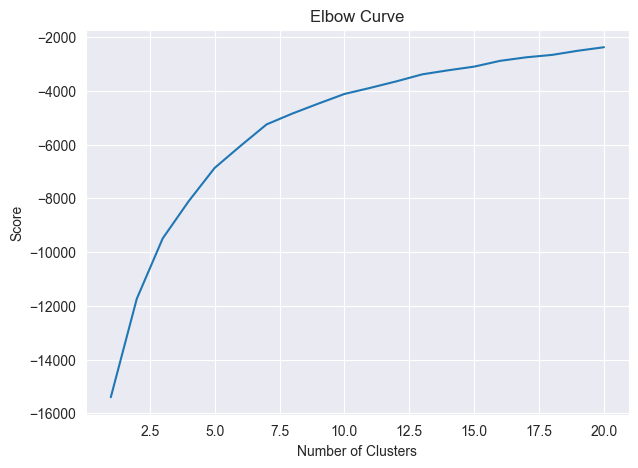

In [38]:
plt.figure(figsize=(7, 5))

nc = range(1, 21)
kmeans = [KMeans(n_clusters=i, n_init=10) for i in nc]
score = [kmeans[i].fit(data_standar).score(data_standar) for i in range(len(kmeans))]

plt.plot(nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## K-means

In [39]:
kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(data_standar)

In [69]:
labels = kmeans.labels_

x = data.iloc[:, 0]
y = data.iloc[:, 1]
z = data.iloc[:, 2]

df = pd.DataFrame({'X': x, 'Y': y, 'Z': z, 'Cluster': labels})

fig = px.scatter_3d(df,
                    x='X', y='Y', z='Z',
                    color='Cluster',
                    title=f'K-means con {n_clusters} clusters')
fig.show()

### Se puede observar las diferencias de las agrupaciones, entre ellas resalta un grupo que está bastante alejado en relación al resto de los datos. Por lo analizado anteriormente corresponde a los datos de grapes y apples.

# Clustering jerárquico
### Calcular el número óptimo de clusters

In [41]:
distancias=[]
for i in range(1, 30):
    clustering = AgglomerativeClustering(n_clusters=i)
    clustering.fit(data_standar)

    pairwise_distances = cdist(data_standar, data_standar, 'euclidean')

    distancia_total = 0
    for j in range(i):
        cluster_indices = np.where(clustering.labels_ == j)
        distancia_total += pairwise_distances[cluster_indices][:, cluster_indices].sum()

    distancias.append(distancia_total)

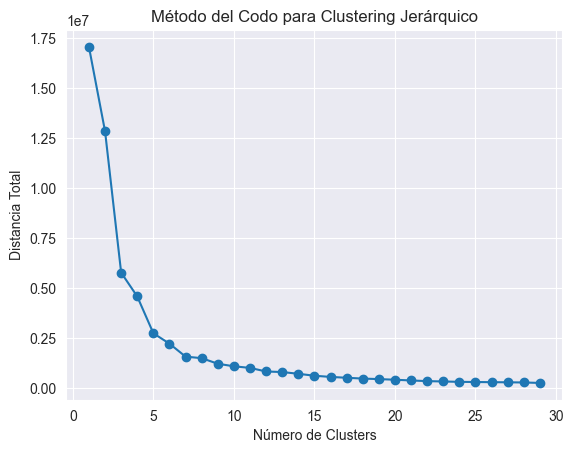

In [42]:
plt.plot(range(1, 30), distancias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Distancia Total')
plt.title('Método del Codo para Clustering Jerárquico')
plt.show()

### Vemos que un buen número de clusters sería 9 - 10

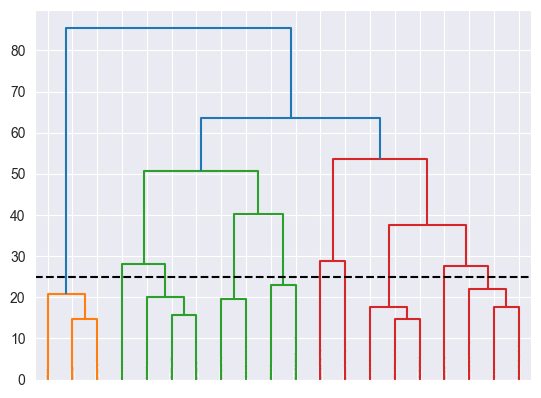

In [43]:
z = linkage(data_standar, 'ward')

dendrogram(z,
           truncate_mode='lastp',
           p=20,
           show_leaf_counts=False,
           show_contracted=True)
plt.axhline(y=25, c='k', linestyle='dashed')
plt.show()

### Como criterio para determinar el número de clusters utilizo la profundidad 4 del árbol.

In [44]:
n_clusters = 10
clustering = AgglomerativeClustering(n_clusters=n_clusters)

cluster_assignments = clustering.fit_predict(data_standar)

df['cluster'] = cluster_assignments

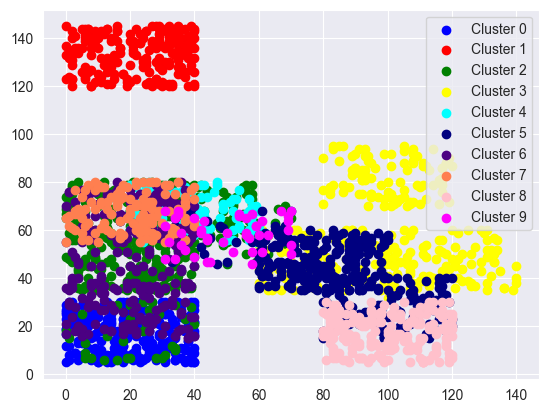

In [45]:
colors = ['blue', 'red', 'green',
          'yellow', 'cyan', 'navy',
          'indigo', 'coral', 'pink',
          'magenta']

for i in range(10):
    plt.scatter(
        df.iloc[cluster_assignments == i, 0],
        df.iloc[cluster_assignments == i, 1],
        c=colors[i],
        label=f'Cluster {i}')

plt.legend()

## Silhouette score

In [46]:
y_predict = clustering.fit_predict(data_standar)

silhouette_score(data_standar, y_predict)

0.33372442080864956

### El coeficiente de Silhouette indica una calidad de clustering moderada (valor de aprox 0.33)

## Número óptimo de clusters

In [47]:
optimalk = OptimalK(n_jobs=1, n_iter=50)

optimalk(data_standar.astype('float'),
         n_refs=60,
         cluster_array=np.arange(2, 10))

9

# Conclusión:
 En el proceso de análisis de datos, se llevó a cabo una serie de pasos esenciales para comprender en profundidad la estructura y distribución del conjunto de datos agrícola. Estos pasos incluyeron la exploración de los atributos, la estandarización de los datos y la aplicación de diversas técnicas de reducción dimensional y clustering.

 Para estandarizar los datos, utilicé el método Standar Scaler para asegurarme de que todas las variables tengan la misma escala, lo que es fundamental para muchas técnicas de análisis.

 Aplique PCA (Análisis de Componentes Principales) para determinar el número de componentes principales del dataset. Mediante el PCA, se reduce la dimensionalidad de los datos. Determine que el número de componentes principales que capturaba una cantidad significativa de la varianza en los datos es 4, lo que me permitió simplificar la representación de los datos sin perder información esencial.
 Para esta elección me basé en los criterios de selección: 
* Proporción de variancia acumulada (~75% -80%)
* Criterio de Kaiser (eigenvalues > 1)

 Aplique Isomap para preservar la estructura de vecindario de los datos en una representación de menor dimensión. Variando el número de vecinos, pude observar cómo la estructura se veía afectada, a medida que los hiperparámetros aumentan se nota mas separción entre los clusters. También se puede observar que los puntos que se encuentran lejos de los demás en el espacio, podrían representar anomalías, outliers o podrían tener características distintas o inusuales en comparación con el resto de los datos, en este caso, como se observó en la exploración de datos, son los correspondientes a grapes y apples.

 t-SNE (t-distributed Stochastic Neighbor Embedding): Utilice t-SNE para explorar la estructura de los datos en un espacio de menor dimensión. Ajustando parámetros como el número de iteraciones y la perplejidad para obtener visualizaciones significativas de los datos. Pude observar cómo a medida que se aumenta el valor de perplexity, los agrupamientos comienzan a distinguirse mejor, formando agrupamientos más uniformes. Si el valor es muy alto puede hacer que los agrupamientos no sean tan significativos. El número de iteraciones afecta la calidad de la convergencia del algoritmo. Más iteraciones pueden conducir a una mejor solución, pero también aumentan el tiempo de ejecución.

 Apliqué el algoritmo de K-means para agrupar los datos en clústeres y utilicé el método GAP para determinar el número óptimo de clústeres. Esto permite identificar patrones de agrupación en los datos. Al visualizar los resultados, puede observar las diferencias de las agrupaciones, entre ellas resalta un grupo que está bastante alejado en relación al resto de los datos. Por lo analizado anteriormente corresponde a los datos de grapes y apples.

 Clustering Jerárquico: Emplee el clustering jerárquico para analizar cómo los datos se agrupaban de manera jerárquica. Utilice el puntaje de Silhouette y el método GAP para determinar el número más representativo de clústeres. El método del codo y el dendrograma sugieren un número óptimo de clústeres alrededor de 9-10. La evaluación del coeficiente de Silhouette indica una calidad de clustering moderada (valor de aproximadamente 0.33). La librería OptimalK sugiere un número óptimo de clústeres de 8.